In [1]:
#importing the libraries
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

In [3]:
#Loading the dataset
dataset =pd.read_csv("tata.csv")

In [4]:
dataset

,date,open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,27-07-2010,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
#to_datetime function for converting "date" object data type into datetime data type
dataset['date']= pd.to_datetime(dataset['date'], infer_datetime_format=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2035 non-null   datetime64[ns]
 1   open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


# Additive Decomposition

We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an additive model.

Text(0, 0.5, 'Residual')

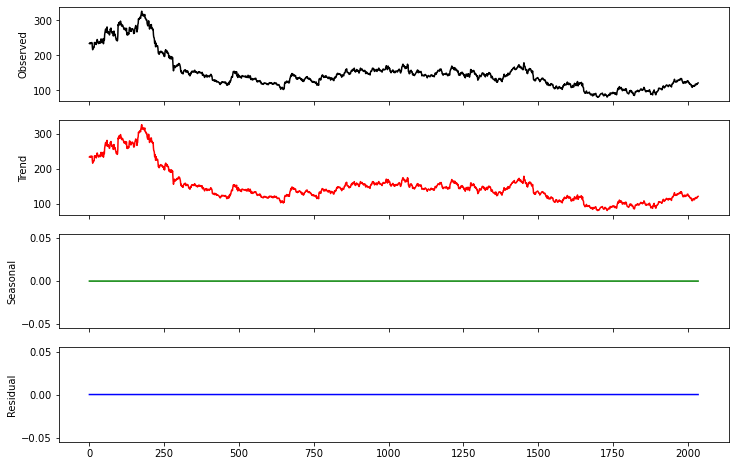

In [12]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(dataset['Close'], model='additive', period=1)
 
fig, axes = plt.subplots(4, 1, sharex=True)

result.observed.plot(ax=axes[0], legend=False, color='k')
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='r')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color='g')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='b')
axes[3].set_ylabel('Residual')

We can see that the entire series was taken as the trend component and that there was no seasonality.

We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.

# Multiplicative Decomposition

We can contrive a quadratic time series as a square of the time step from 1 to 99, and then decompose it assuming a multiplicative model.

Text(0, 0.5, 'Residual')

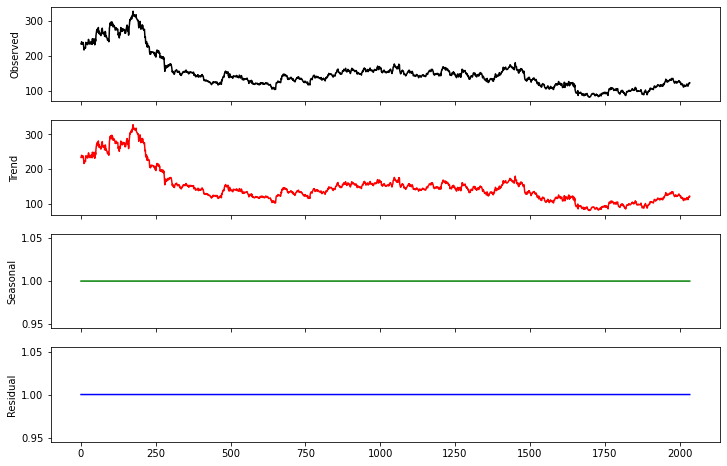

In [15]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(dataset['open'], model='multiplicative', period=1)

fig, axes = plt.subplots(4, 1, sharex=True)

result.observed.plot(ax=axes[0], legend=False, color='k')
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='r')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color='g')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='b')
axes[3].set_ylabel('Residual')
 